In [45]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [46]:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset['label'].replace('Benign',0,inplace=True) 
breast_dataset['label'].replace('Malignant',1,inplace=True)
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [47]:
from sklearn.preprocessing import StandardScaler


x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [48]:
k=5    #设置降维的占比
pca= PCA(n_components=k)#调用PCA函数，先实例化
pcaCom = pca.fit_transform(x)
pcaCom = pd.DataFrame(pcaCom)
print("主成分的数量：",pca.n_components_)
X = pcaCom.iloc[:, [0, 1, 2, 3, 4]].values
#X = pcaCom.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]].values
Y = breast_dataset.iloc[:, 30].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

主成分的数量： 5


In [49]:
model = GaussianNB()
model.fit(X_train, Y_train)
Y_pred= model.predict(X_test)
Y_pred[0:9]


array([0., 1., 0., 1., 1., 1., 0., 0., 1.])

In [50]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9210526315789473
Precision: 0.9
Recall: 0.9692307692307692


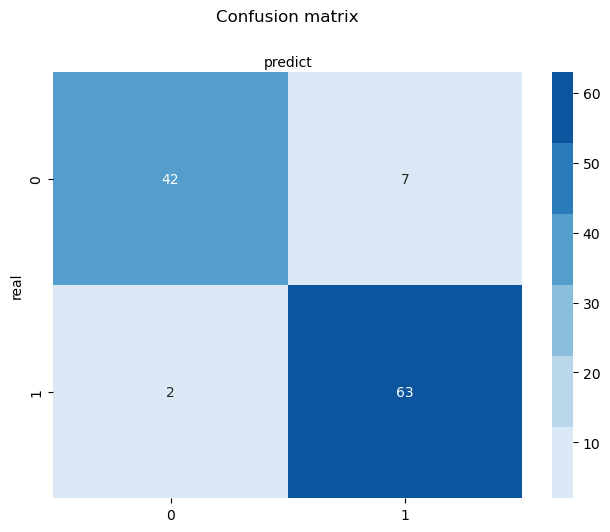

In [51]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(pd.DataFrame(cm),cmap=sns.color_palette("Blues"),annot=True,fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('real')
plt.xlabel('predict')
plt.show()    